<a href="https://colab.research.google.com/github/krishnashahu/Project_Template_C10_Travelling_in_Ship/blob/main/PRO_C127_Project_Boilerplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clone the required dataset from given 

In [14]:
#Cloning the required dataset
!git clone https://github.com/procodingclass/Pro-M3-Hurricane-Damage-Dataset

fatal: destination path 'Pro-M3-Hurricane-Damage-Dataset' already exists and is not an empty directory.


Display first image from training dataset

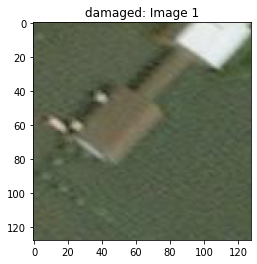

In [15]:
#Display image
from matplotlib import pyplot
from matplotlib.image import imread

training_damaged_image = "/content/Pro-M3-Hurricane-Damage-Dataset/train/damage/image (1).jpeg"

# load image pixels
image = imread(training_damaged_image)

pyplot.title("damaged: Image 1")

# plot raw pixel data
pyplot.imshow(image)

# show the figure
pyplot.show()

Perform augmentation on Training dataset

In [16]:
#Training data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img


# Random Data Augmentation(Rescale, Rotation, Flips, Zoom, Shifts) using ImageDataGenerator 
training_data_generator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')


# Image Directory
training_image_directory = "/content/Pro-M3-Hurricane-Damage-Dataset/train"

# Generate Preprocessed Augmented Data
training_augmented_images = training_data_generator.flow_from_directory(
    training_image_directory,
    target_size=(180,180))

Found 300 images belonging to 2 classes.


Visualize the augmented images in four sub-plots

In [17]:
#Data validation
# Random Data Augmentation(Rescale) using ImageDataGenerator
validation_data_generator = ImageDataGenerator(rescale = 1.0/255)

# Image Directory
validation_image_directory = "/content/Pro-M3-Hurricane-Damage-Dataset/validate"

# Generate Preprocessed Augmented Data
validation_augmented_images = validation_data_generator.flow_from_directory(
    validation_image_directory,
    target_size=(180,180))

Found 300 images belonging to 2 classes.


In [18]:
#class labels
training_augmented_images.class_indices

{'damage': 0, 'no_damage': 1}

In [20]:
#Define CNN
import tensorflow as tf
model = tf.keras.models.Sequential([
    
    # 1st Convolution & Pooling layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # 2nd Convolution & Pooling layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 3rd Convolution & Pooling layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 4th Convolution & Pooling layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a Dense Layer

    #uncomment the correct code to flatten the results
    tf.keras.layers.Flatten(),
    #tf.keras.Layers.Flatten(),
    #tf.keras.Layers.flatten(),
    #tf.Keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.5),

    # Classification Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 20, 20, 128)     

In [22]:
#Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
#Fit and save
#uncomment the correct code to fit and save the model
history = model.fit(training_augmented_images, 
            epochs=20, validation_data = validation_augmented_images, verbose=True)
#history = model.fit(validation_augmented_images, 
            #epochs=20, validation_data = raining_Augmented_images, verbose=False)
#history = model.fit(training_Augmented_images, 
            #epochs=20, validation_data = validation_augmented_images, verbose=true)
#history = model.fit(validation_augmented_images, 
            #epochs=20, validation_data = training_Augmented_images, verbose=False)


#model.Save("Hurricane_damage.H5")
#model1.save("Hurricane_damage.h5")
model.save("Hurricane_damage.h5")
#model1.Save("Hurricane_damage.H5")


Epoch 1/20


KeyboardInterrupt: ignored